<a href="https://colab.research.google.com/github/cmason30/datascience-funhouse/blob/master/pytorch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)



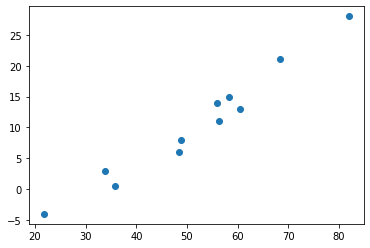

In [3]:
plt.scatter(t_u, t_c)
plt.show()

In [4]:
def model(t_u, w, b):
  return w * t_u + b

In [5]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [6]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [7]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)

t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(t_p,t_c)
loss

tensor(1763.8846)

In [9]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

In [10]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)



In [11]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = \
  (loss_fn(model(t_u, w, b + delta), t_c) -
  loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [13]:
def dloss_fn(t_p, t_c):
  dsq_diffs=2* (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [14]:
def dmodel_db(t_u, w, b):
  return 1.0

In [15]:
def dmodel_dw(t_u, w, b):
  return t_u

In [16]:
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [25]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
              train_t_c, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)
    optimizer.zero_grad()
    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            f" Validation loss {val_loss.item():.4f}")
  return params



In [19]:
t_un = 0.1 * t_u

In [28]:
params = torch.tensor([1.0, 0.0], requires_grad=True) 
learning_rate = 1e-2

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)



NameError: ignored

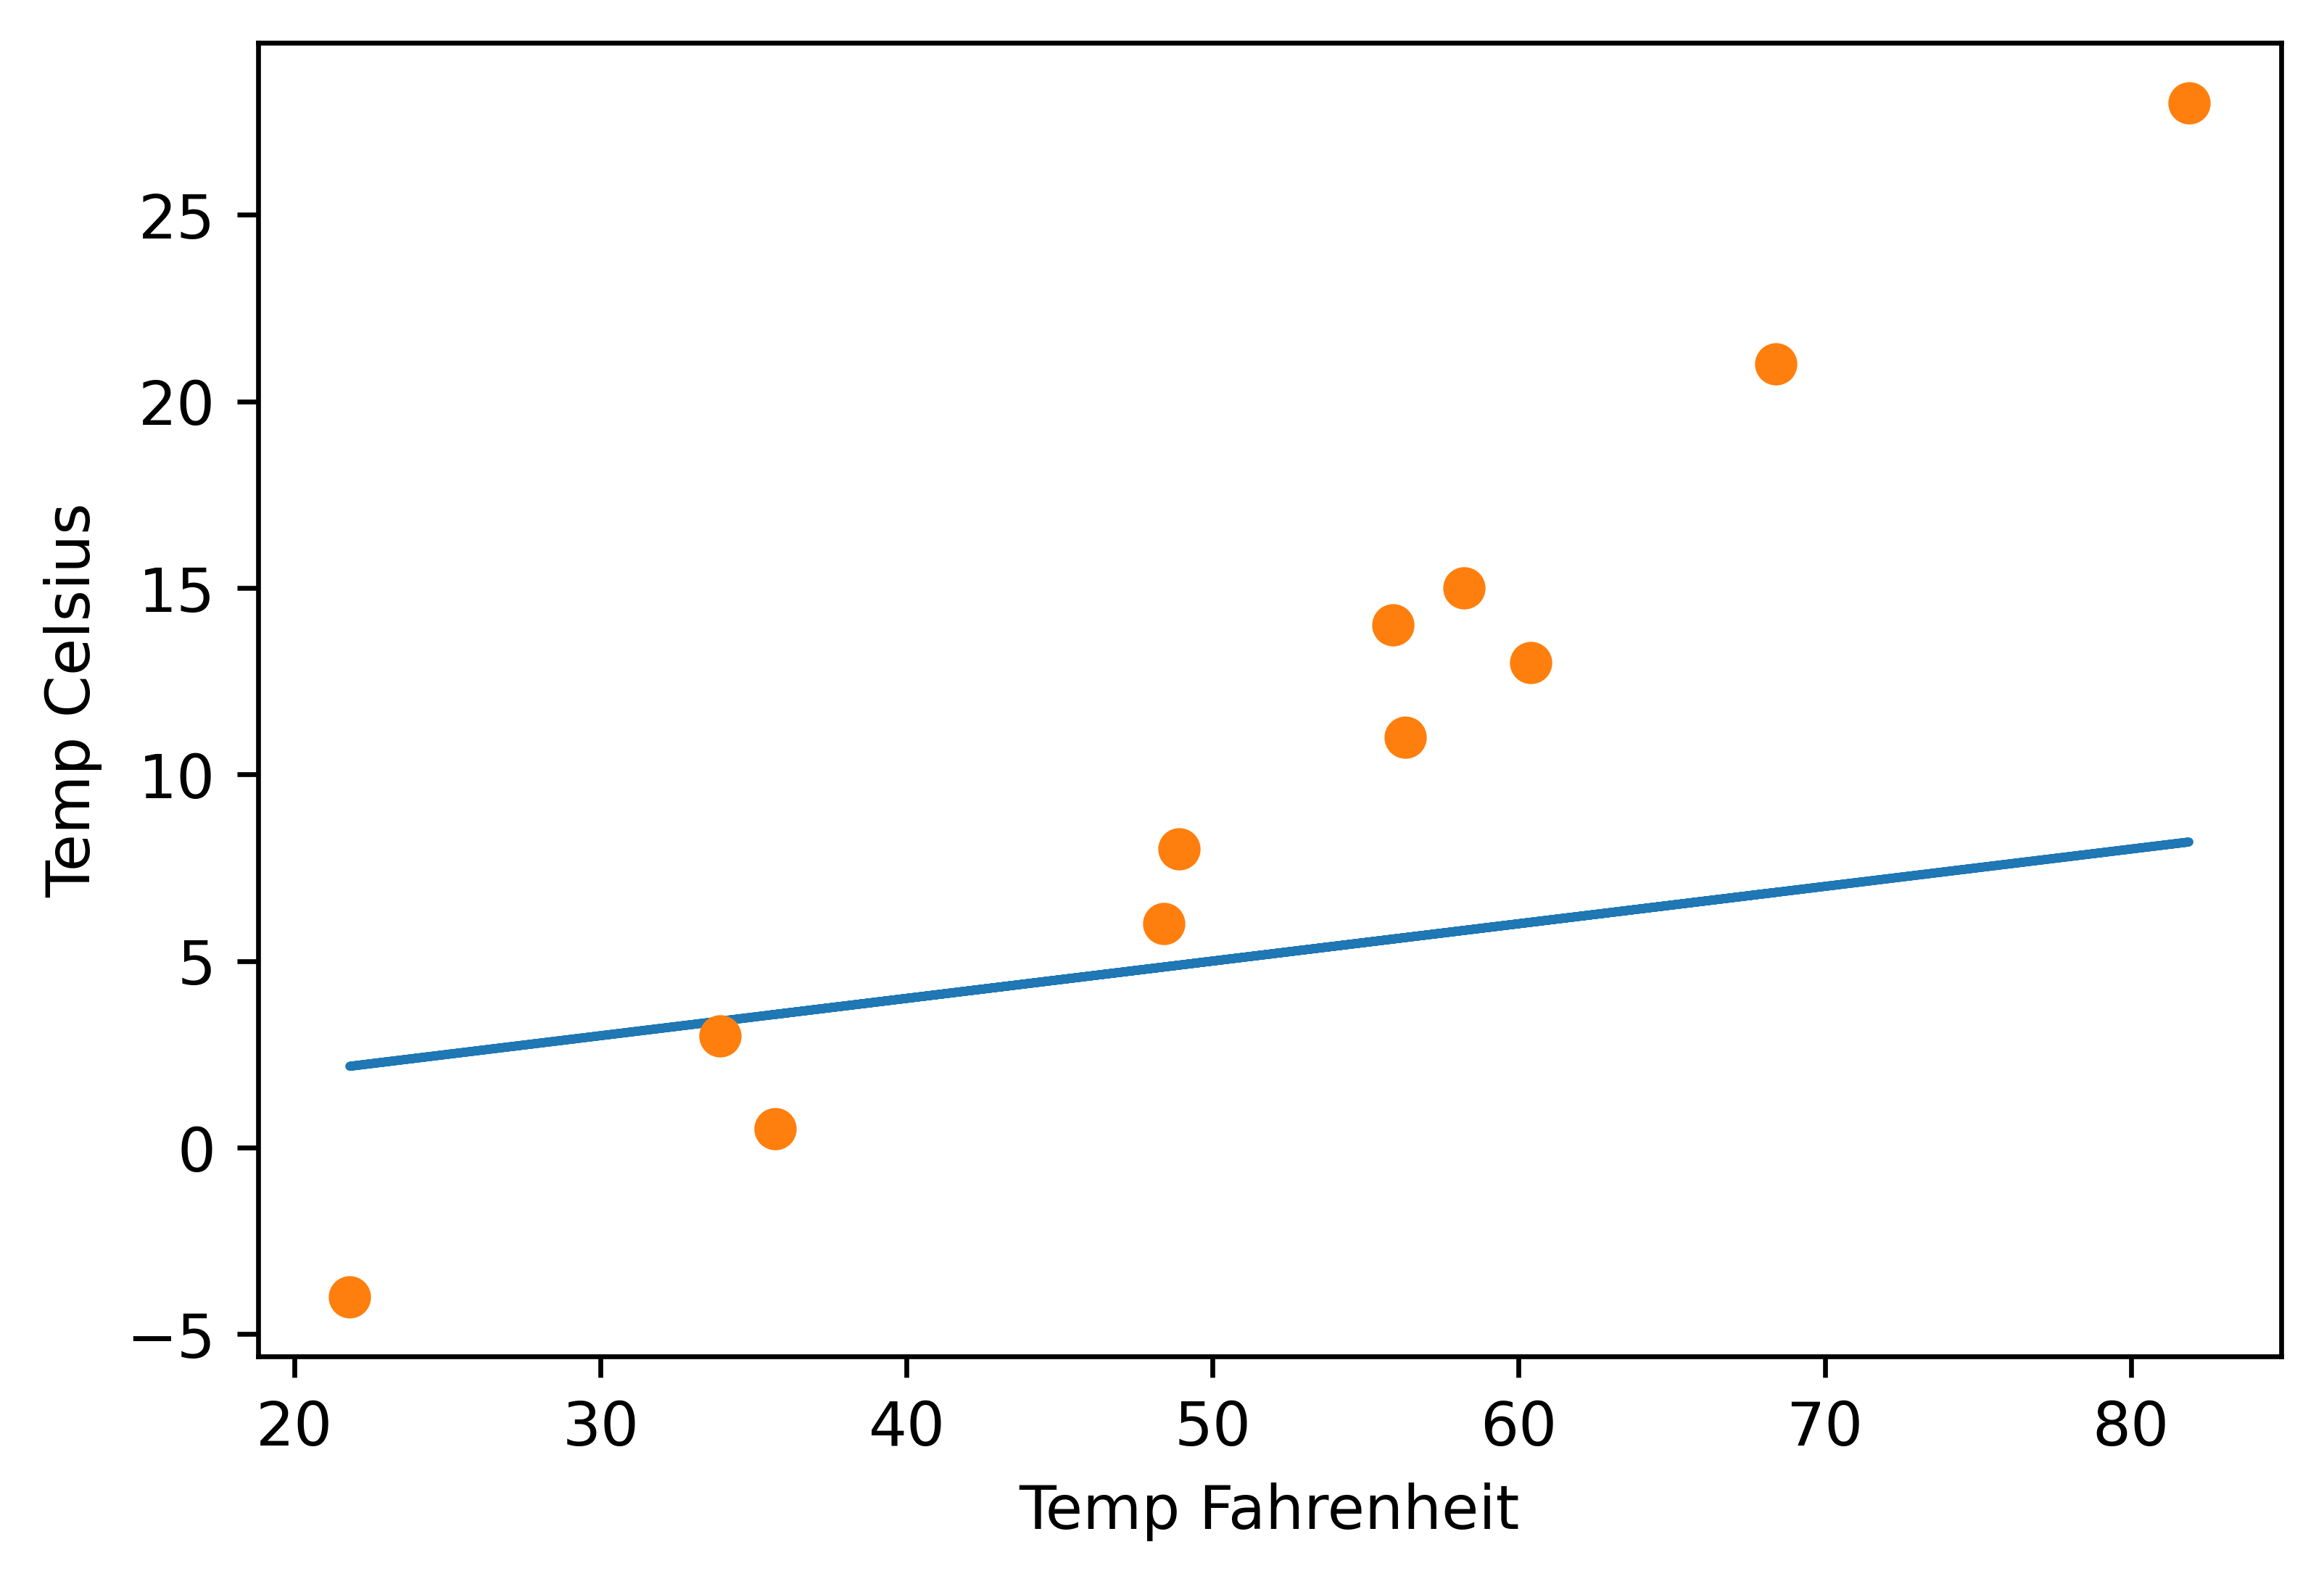

In [21]:
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temp Fahrenheit")
plt.ylabel("Temp Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(),'o')

In [22]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)


TypeError: ignored